In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [202]:
#####FUCNIONES#####

#Limpieza
#Ahora vamos a quedarnos solo con los contornos mayores a 10 (Es uan forma de sacar el ruido)
def filtrar_contornos(contornos, umbral):
    '''Esta función recibe una lista de contornos, y devuelve aquellos que tengan más
    puntos que el valor umbral'''
    contornos_filtrada = []
    i = 0
    while i < len(contornos):  
        if len(contornos[i])>umbral:  #Si el contorno (contornos[i]) tiene mas de 15 puntos,
            contornos_filtrada.append(contornos[i]) #Lo agregamos a la lista filtrada
        i = i + 1
    return contornos_filtrada

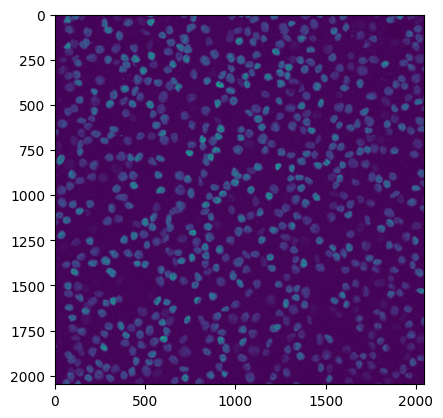

In [203]:
#Ver la foto con matplotlib
ruta = "Fotos/nucleos.tif"
imagen = plt.imread(ruta)
plt.imshow(imagen)


In [204]:
#¿Por qué la muestra con esos colores?
imagen.shape

(2048, 2048)

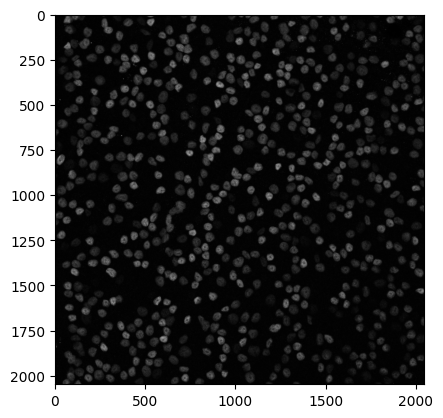

In [205]:
#Ahora abrimos la misma imagen, pero con la libreria cv2
img = cv2.imread(ruta)
plt.imshow(img)

In [206]:
img.shape

(2048, 2048, 3)

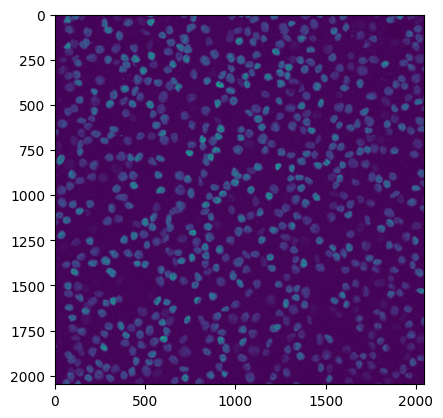

In [207]:
#CV2, por defecto, crea las imagenes en formato BGR, con cv2.COLOR_BGR2RGB o cv2.COLOR_BGR2GRAY podemos pasarlas al formato que queramos
nucleos = cv2.imread(ruta, cv2.COLOR_BGR2GRAY)
plt.imshow(nucleos)

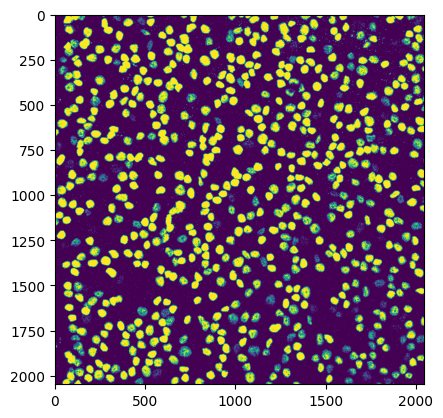

In [208]:
#Primero vamos a necesitar una imagen binaria. Antes lo hicimos con numpy, pero cv2 ya tare una función para eso

umbral_min = 20
umbral_max = 255

Threshold, bi_image = cv2.threshold(nucleos, umbral_min, umbral_max, cv2.THRESH_BINARY)
#Notar que cv2.threshold devuelve 2 cosas, el umbral minimo y el array que queremos.
#El 4to parametro es c[omo calcula es umbral, y se puede ver en https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html
plt.imshow(bi_image)

In [209]:

#Ahora vamos por los contornos
contours, hierarchy = cv2.findContours(image = bi_image, mode = cv2.RETR_LIST, method = cv2.CHAIN_APPROX_NONE)
#Contours es una lista con muchas otras listas adentro, donde cada lista interna tiene una serie de puntos que definen un contorno.


In [210]:
#Veamos cómo funcionan los contornos:
len(contours)

57130

Hay unos 57062 contornos. Parecen bastantes más de los núcleos que hay en la imagen.

(array([5.6248e+04, 2.3600e+02, 4.4000e+01, 1.4000e+01, 9.0000e+00,
        5.0000e+00, 1.4000e+01, 4.1000e+01, 7.7000e+01, 6.5000e+01,
        7.0000e+01, 5.3000e+01, 4.7000e+01, 4.4000e+01, 1.9000e+01,
        2.4000e+01, 2.1000e+01, 2.2000e+01, 1.4000e+01, 1.2000e+01,
        6.0000e+00, 5.0000e+00, 8.0000e+00, 5.0000e+00, 6.0000e+00,
        5.0000e+00, 4.0000e+00, 5.0000e+00, 0.0000e+00, 0.0000e+00,
        2.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([  1.  ,  20.88,  40.76,  60.64,  80.52, 100.4 , 120.28, 140.16,
        160.04, 179.92, 199.8 , 219.68, 239.56, 259.44, 279.32, 299.2 ,
        319.08, 338.96, 358.84, 378.72, 398.6 , 418.48, 438.36, 458.24,
        478.12, 498.  , 517.88, 537.76, 557.64, 577.52, 597.4 , 617.28,
        637.16, 657.04, 676.92

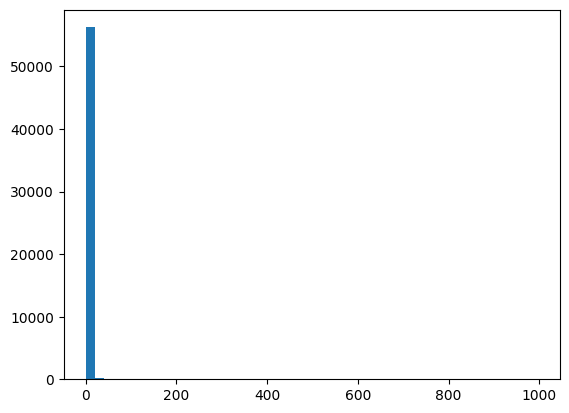

In [211]:
#Veamos cuántos pixels tiene cada contorno
contour_len = [len(contour) for contour in contours]
plt.hist(contour_len, bins = 50)

In [212]:
#Usnado la función que definimos al ppio, filtramos la lista de contornos para quedarnos con aquellos que tienen más de 100 puntos:
contornos = filtrar_contornos(contours, 100)

In [213]:
len(contornos)

579

In [214]:
contornos[0]

array([[[1332, 2035]],

       [[1333, 2036]],

       [[1333, 2037]],

       [[1332, 2038]],

       [[1331, 2037]],

       [[1330, 2037]],

       [[1329, 2037]],

       [[1329, 2038]],

       [[1328, 2039]],

       [[1327, 2039]],

       [[1326, 2038]],

       [[1325, 2038]],

       [[1324, 2038]],

       [[1323, 2038]],

       [[1322, 2037]],

       [[1322, 2038]],

       [[1323, 2039]],

       [[1322, 2040]],

       [[1321, 2041]],

       [[1320, 2041]],

       [[1319, 2041]],

       [[1320, 2042]],

       [[1321, 2043]],

       [[1321, 2044]],

       [[1320, 2045]],

       [[1319, 2046]],

       [[1318, 2045]],

       [[1319, 2046]],

       [[1320, 2047]],

       [[1321, 2047]],

       [[1322, 2046]],

       [[1323, 2046]],

       [[1324, 2046]],

       [[1325, 2047]],

       [[1326, 2047]],

       [[1327, 2047]],

       [[1328, 2047]],

       [[1329, 2047]],

       [[1330, 2047]],

       [[1331, 2047]],

       [[1332, 2047]],

       [[1333, 2

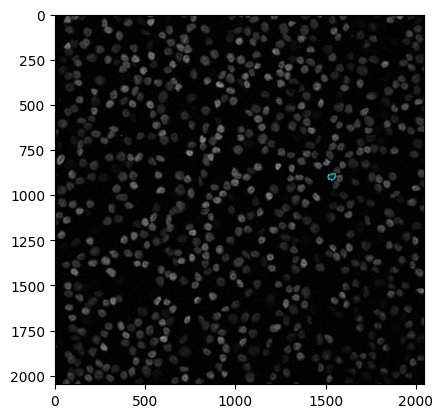

In [215]:
#La función cv2.drawContours nos permite dibujar los contornos en una imagen.
#Vamos a dibujar un contorno cualquiera, para ver cómo se ve.
cv2.drawContours(image = img, contours = [contornos[320]], contourIdx = -1, color = (0,255,255), thickness = 2)
plt.imshow(img)


In [216]:
#Calculamos las areas para todos los contornos usando la funcion que viene en cv2

areas = []
for ctn in contornos:
    area = cv2.contourArea(ctn)
    areas.append(area)

minimo = 43.0, media = 1483.5, max = 9419.5


C:\Users\salva\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


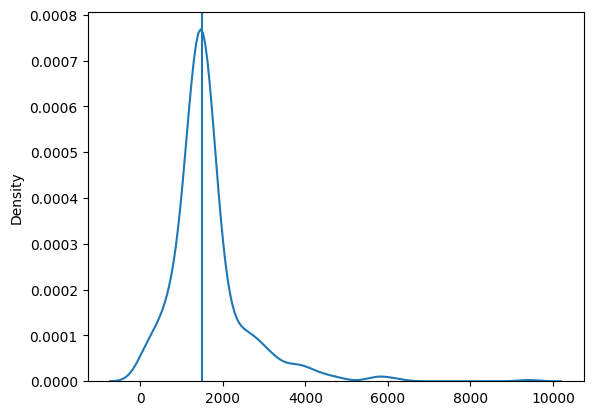

In [217]:
sns.kdeplot(areas)
media = np.median(areas)
max = np.max(areas)
min = np.min(areas)
plt.axvline(media)
print(f"minimo = {min}, media = {media}, max = {max}")

Vamos a asumir que la media es más o menos lo que mide un núcleo solo. Asi que vamos a usar eso como area para un nucleo, 2*moda el area de 2 nucleos y etc...

In [218]:
#Primero hacemos 6 listas donde vamos a ir guardando los contornos según su tamaño
l1, l2, l3, l4 = [],[],[], []
nucleos_tot = 0
i = 0
while i < len (contornos):    
    
    if areas[i] < 1.5 * media:
        l1.append(contornos[i])
        nucleos_tot = nucleos_tot + 1
        
    elif areas[i] < 2.5 * media:
        l2.append(contornos[i])
        nucleos_tot = nucleos_tot + 2

    elif areas[i] < 3.5 * media:
        l3.append(contornos[i])
        nucleos_tot = nucleos_tot + 3

    else:
        l4.append(contornos[i])
        nucleos_tot = nucleos_tot + 4
        
    i = i + 1
    


Conteo de núcleos: 695


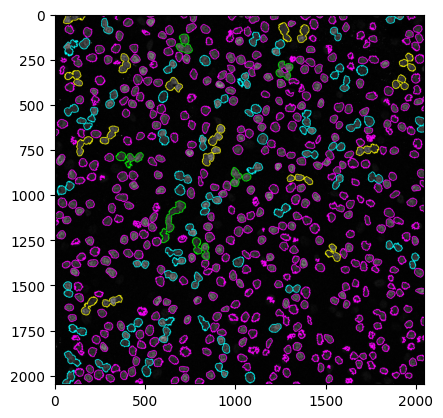

In [219]:

#Dibujamos todos los contornos en la imagen
cv2.drawContours(image = img, contours = l1, contourIdx = -1, color = (255,0,255), thickness = 2)
cv2.drawContours(image = img, contours = l2, contourIdx = -1, color = (0,255,255), thickness = 2)
cv2.drawContours(image = img, contours = l3, contourIdx = -1, color = (255,255,0), thickness = 2)
cv2.drawContours(image = img, contours = l4, contourIdx = -1, color = (0,255,0), thickness = 2)

#Mostramos la imagen sobre la cual dibujamos los contornos:
plt.imshow(img)

print("Conteo de núcleos:", nucleos_tot)